In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics,cluster,mixture,datasets,decomposition,preprocessing,feature_extraction
from sklearn.manifold import TSNE

## 加载数据

In [2]:
digits = datasets.load_digits()
digits_data = preprocessing.scale(digits.data)
digits_labels = digits.target

n_digits = len(np.unique(digits.target))
n_samples, n_features = digits_data.shape
print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [3]:
news = datasets.fetch_20newsgroups()

vectorizer = feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=10000,
                                min_df=2, stop_words='english', use_idf=True)
news_data = vectorizer.fit_transform(news.data)
# 降维 100维, 只取前1/10数据集
tsvd = decomposition.TruncatedSVD(n_components=100)
news_data = tsvd.fit(news_data.transpose()).components_.transpose()
news_labels = news.target
news_data = news_data[::10]
news_labels = news_labels[::10]

n_groups = len(np.unique(news.target))
n_samples, n_features = news_data.shape
print("n_groups: %d, \t n_samples %d, \t n_features %d"
      % (n_groups, n_samples, n_features))

n_groups: 20, 	 n_samples 1132, 	 n_features 100


## 降维数据用于可视化

In [4]:
tsne = TSNE(n_components=2)
digits_data_2d = tsne.fit_transform(digits_data)
news_data_2d = tsne.fit_transform(news_data)

In [5]:
def visualize(data, labels):
    x = []
    y = []
    for i in data:
        x.append(i[0])
        y.append(i[1])
    fig = plt.figure(figsize=(10, 10))
    plt.scatter(x, y, c=labels)
    plt.xticks(())
    plt.yticks(())
    plt.show()

## 评估

In [20]:
def bench(estimator, data, labels):
    print('time\t\tNMI\t\thomogeneity\t\tcompleteness')
    t0 = time()
    estimator.fit(data)
    print('%.2fs\t\t%.3f\t\t%.3f\t\t\t%.3f'
          % ((time() - t0),
             metrics.normalized_mutual_info_score(labels, estimator.labels_, average_method='arithmetic'),
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_)))

#### digits

In [43]:
methods = [
#     cluster.KMeans(init='k-means++', n_clusters=n_groups),
#     cluster.AffinityPropagation(),
#     cluster.MeanShift(),
#     cluster.SpectralClustering()
#     cluster.hierarchical(),
    cluster.AgglomerativeClustering(),
    cluster.DBSCAN(),
    mixture.GaussianMixture(),
]

***************************************************************************
AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2,
                        pooling_func='deprecated')
------------------------------ digits ------------------------------
time		NMI		homogeneity		completeness
0.49s		0.378		0.239			0.908


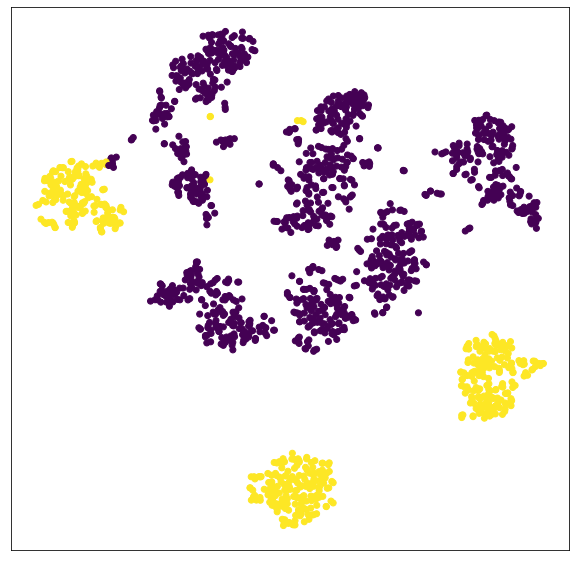

------------------------------- news -------------------------------
time		NMI		homogeneity		completeness
0.08s		0.016		0.008			0.533


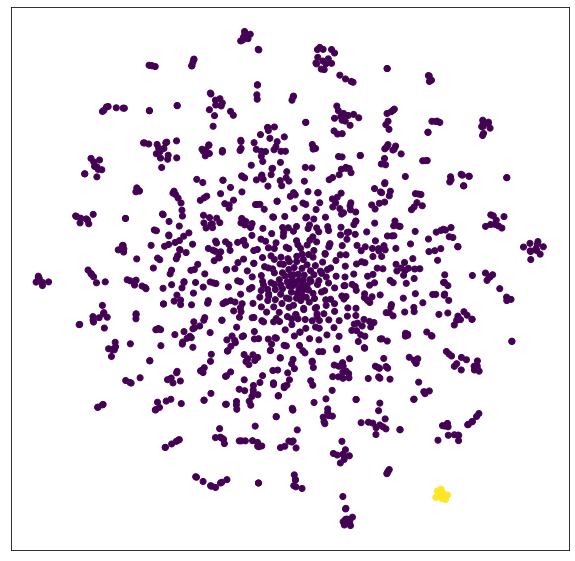



***************************************************************************
DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)
------------------------------ digits ------------------------------
time		NMI		homogeneity		completeness
0.33s		0.000		0.000			1.000


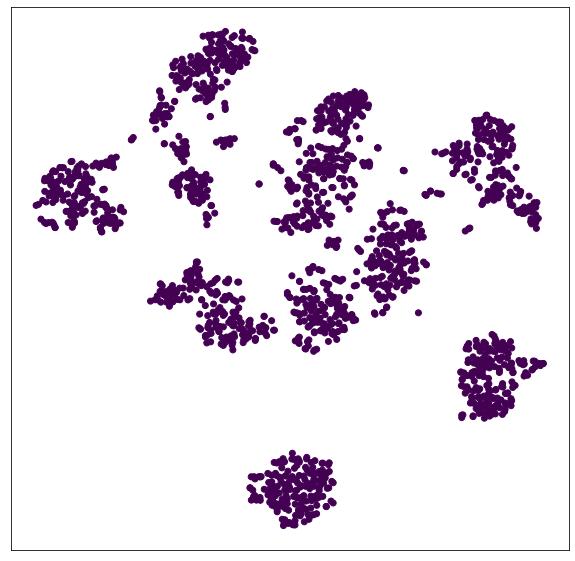

------------------------------- news -------------------------------
time		NMI		homogeneity		completeness
0.07s		0.000		0.000			1.000


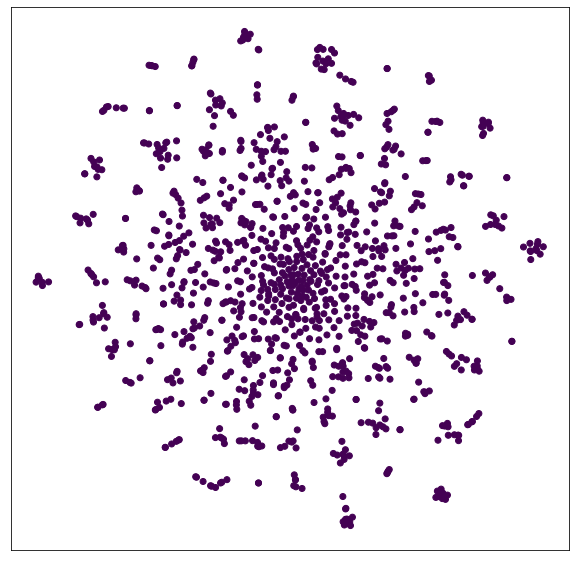



***************************************************************************
GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)
------------------------------ digits ------------------------------
time		NMI		homogeneity		completeness


AttributeError: 'GaussianMixture' object has no attribute 'labels_'

In [44]:
for method in methods:
    print(75 * '*')
    print(method)
    print(30*'-'+' digits '+30*'-')
    bench(method, digits_data, digits_labels)
    visualize(digits_data_2d, method.labels_)
    print(31*'-'+' news '+31*'-')
    bench(method, news_data, news_labels)
    visualize(news_data_2d, method.labels_)
    print('\n')

In [ ]:
print(61 * '_')
print('method\t\t\ttime\tNMI\thomo\tcompl\t')
bench(method='K-Means',estimator=cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10), 
      data=digits_data, labels=digits_labels)
bench(method='Affinity propagation',estimator=cluster.AffinityPropagation(),data=digits_data,labels=digits_labels)
bench(method='Mean-shift',estimator=cluster.MeanShift(),data=digits_data,labels=digits_labels)
bench(method='Spectral clustering',estimator=cluster.SpectralClustering(),data=digits_data,labels=digits_labels)
bench(method='Ward hierarchical clustering',estimator=cluster.hierarchical(),data=digits_data,labels=digits_labels)
bench(method='Agglomerative clustering',estimator=cluster.AgglomerativeClustering(),data=digits_data,labels=digits_labels)
bench(method='DBSCAN',estimator=cluster.DBSCAN(),data=digits_data,labels=digits_labels)
bench(method='Gaussian mixtures',estimator=mixture.GaussianMixture(),data=digits_data,labels=digits_labels)

# bench_k_means(cluster.KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
#               name="k-means++", data=digits_data, labels=digits_labels)

In [ ]:
print(__doc__)

from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)









bench_k_means(KMeans(init='k-means++', n_clusters=n_digits, n_init=10),
              name="k-means++", data=data)

bench_k_means(KMeans(init='random', n_clusters=n_digits, n_init=10),
              name="random", data=data)

# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit(data)
bench_k_means(KMeans(init=pca.components_, n_clusters=n_digits, n_init=1),
              name="PCA-based",
              data=data)
print(82 * '_')

# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Lars Buitinck
# License: BSD 3 clause
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np


# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')

# parse commandline arguments
op = OptionParser()
op.add_option("--lsa",
              dest="n_components", type="int",
              help="Preprocess documents with latent semantic analysis.")
op.add_option("--no-minibatch",
              action="store_false", dest="minibatch", default=True,
              help="Use ordinary k-means algorithm (in batch mode).")
op.add_option("--no-idf",
              action="store_false", dest="use_idf", default=True,
              help="Disable Inverse Document Frequency feature weighting.")
op.add_option("--use-hashing",
              action="store_true", default=False,
              help="Use a hashing feature vectorizer")
op.add_option("--n-features", type=int, default=10000,
              help="Maximum number of features (dimensions)"
                   " to extract from text.")
op.add_option("--verbose",
              action="store_true", dest="verbose", default=False,
              help="Print progress reports inside k-means algorithm.")

print(__doc__)
op.print_help()


def is_interactive():
    return not hasattr(sys.modules['__main__'], '__file__')


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)


# #############################################################################
# Load some categories from the training set
categories = [
    'alt.atheism',
    'talk.religion.misc',
    'comp.graphics',
    'sci.space',
]
# Uncomment the following to do the analysis on all the categories
# categories = None

print("Loading 20 newsgroups dataset for categories:")
print(categories)

dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=True, random_state=42)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
print()

labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset "
      "using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(n_features=opts.n_features,
                                   stop_words='english', alternate_sign=False,
                                   norm=None, binary=False)
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(n_features=opts.n_features,
                                       stop_words='english',
                                       alternate_sign=False, norm='l2',
                                       binary=False)
else:
    vectorizer = TfidfVectorizer(max_df=0.5, max_features=opts.n_features,
                                 min_df=2, stop_words='english',
                                 use_idf=opts.use_idf)
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
print()

if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)

    print("done in %fs" % (time() - t0))

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))

    print()


# #############################################################################
# Do the actual clustering

if opts.minibatch:
    km = MiniBatchKMeans(n_clusters=true_k, init='k-means++', n_init=1,
                         init_size=1000, batch_size=1000, verbose=opts.verbose)
else:
    km = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1,
                verbose=opts.verbose)

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, km.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, km.labels_, sample_size=1000))

print()


if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :10]:
            print(' %s' % terms[ind], end='')
        print()